# Calibration of the Optimal Steps Model

This script is an attempt to recompute the results in silver-2016b page 51. The scenario [scenario](./../../../../VadereModelTests/TestOSM_calibration/rimea_04_calibration_osm.scenario) is based on the RiMEA-Test 4. We use the `Teleporter` to model a circular scenario and the parameter `useFreeSpaceOnly = false` to generate high densities. The following code plots all the necessary diagrams.

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from vadere_analysis_tool import ScenarioOutput, VadereProject
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})

def plotVelocityTime(vproject, ending, axes):
    dataFrames = []
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                #df = df[df.velocity > 0]
                ndf['velocity'] = df.velocity.astype(float)
                ndf['timeStep'] = df.timeStep.astype(int)
                ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
                dataFrames.append(ndf)
    concatFrames = pd.concat(dataFrames)
    return sns.lineplot(x="timeStep", y="velocity", data=concatFrames, ax=axes)

def plotDensityTime(vproject, ending, axes):
    dataFrames = []
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                #df = df[df.velocity > 0]
                ndf['density'] = df.velocity.astype(float)
                ndf['timeStep'] = df.timeStep.astype(int)
                ndf['scenario'] = [out.scenario['name']] * len(df.density)
                dataFrames.append(ndf)
    concatFrames = pd.concat(dataFrames)
    return sns.lineplot(x="timeStep", y="density", data=concatFrames, ax=axes)

def plotFundamentalDiagram(vproject, ending):
    dataFrames = []
    for outStr in project.output_dirs :
        out = project.output_dirs[outStr]
        for fileStr in out.files :
            if fileStr.endswith(ending) :
                ndf = pd.DataFrame();
                df = out.files[fileStr]()
                ndf['density'] = df.density.astype(float)
                ndf['velocity'] = df.velocity.astype(float)
                ndf['scenario'] = [out.scenario['name']] * len(df.velocity)
                #ndf = ndf[ndf.density < 7]
                dataFrames.append(ndf)
    concatFrames = pd.concat(dataFrames)
    sns.relplot(x="density", y="velocity", hue="scenario", data=concatFrames,
                height=10, aspect=2)


In [45]:
def plotKladek(x, v, gamma, pmax):
    plt.plot(x, v * (1 - np.exp(-gamma * (1/x - 1/pmax))))

First we load the project

In [163]:
projectFolder = "./../../../../VadereModelTests/TestOSM_calibration/"
project = VadereProject(projectFolder)
#out = project.named_output.C_050_180_180_2018_11_26_16_30_29_355()

loaded 2 out of 2 output directories. 


# Meassurement methods
All methods are described in zhang-2011.

## Method A Plots
The computation of the velocity is slightly different i.e. we use the velocity computed by the current and last foot step.

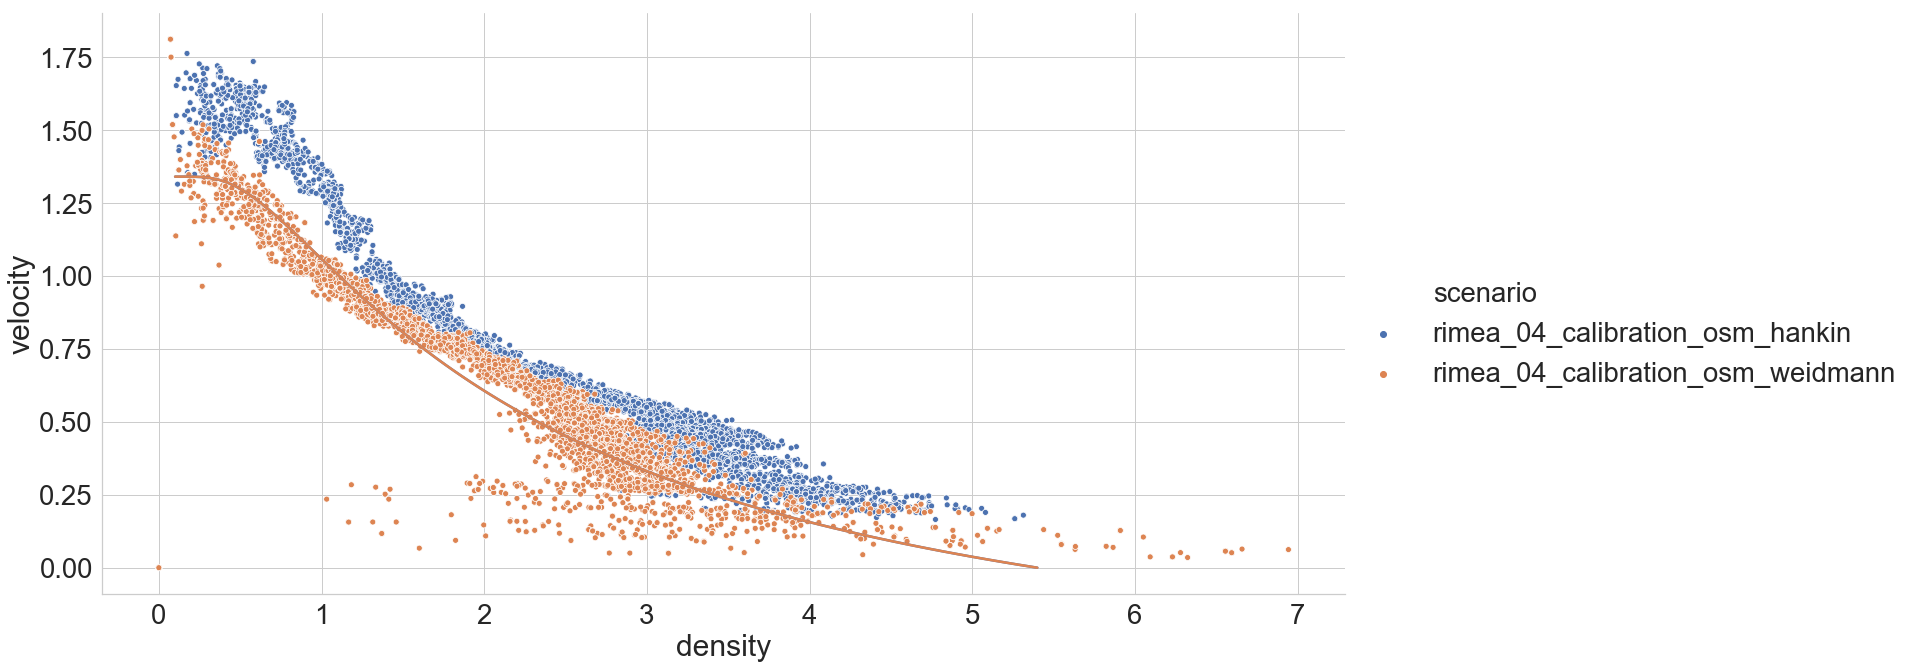

In [164]:
# transform data frame
plotFundamentalDiagram(project, "aTimeStep.fundamentalDiagram")
wmaxDensity = 5.4
wmeanVelocity = 1.34
wgamma = 1.913
wx = np.linspace(0.1, wmaxDensity, 100)
plotKladek(wx, wmeanVelocity, wgamma, wmaxDensity) # plot of the weidmann reference line

hmaxDensity = 5.4
hmeanVelocity = 1.62
hgamma = 1.913
hx = np.linspace(0.1, hmaxDensity, 100)
plotKladek(wx, wmeanVelocity, wgamma, wmaxDensity) # plot of the hankin reference line

## Method B Plots
This method does not work for this scenario since agents run multiple times through the same measurement area.

## Method C Plots
The computation of the velocity is slightly different i.e. we use the velocity computed by the current and last foot step.

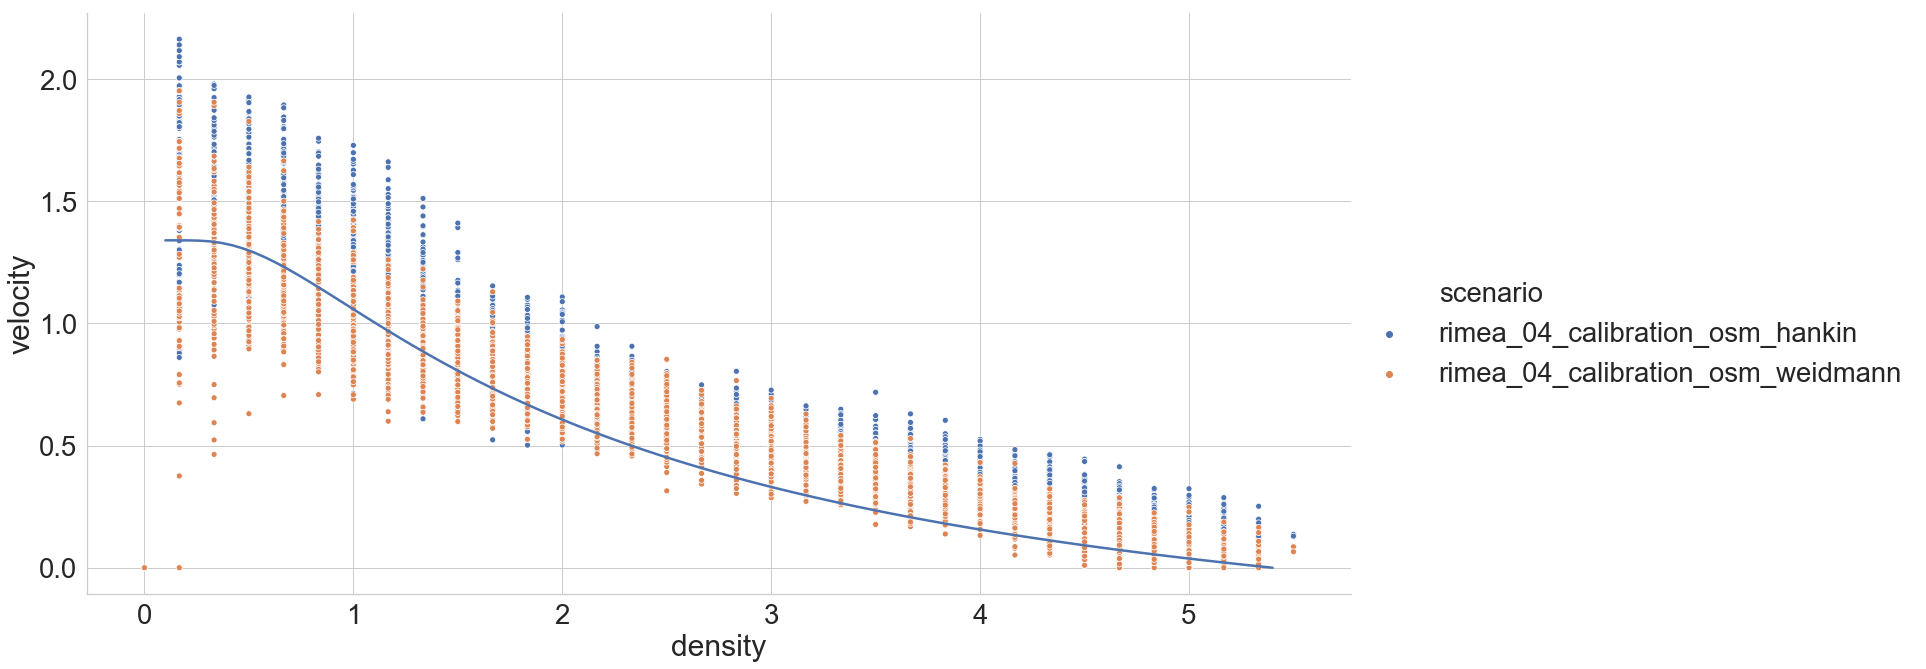

In [165]:
plotFundamentalDiagram(project, "cTimeStep.fundamentalDiagram")
plotKladek(x, meanVelocity, gamma, maxDensity)

## Method D Plots
The computation of the velocity is slightly different i.e. we use the velocity computed by the current and last foot step.

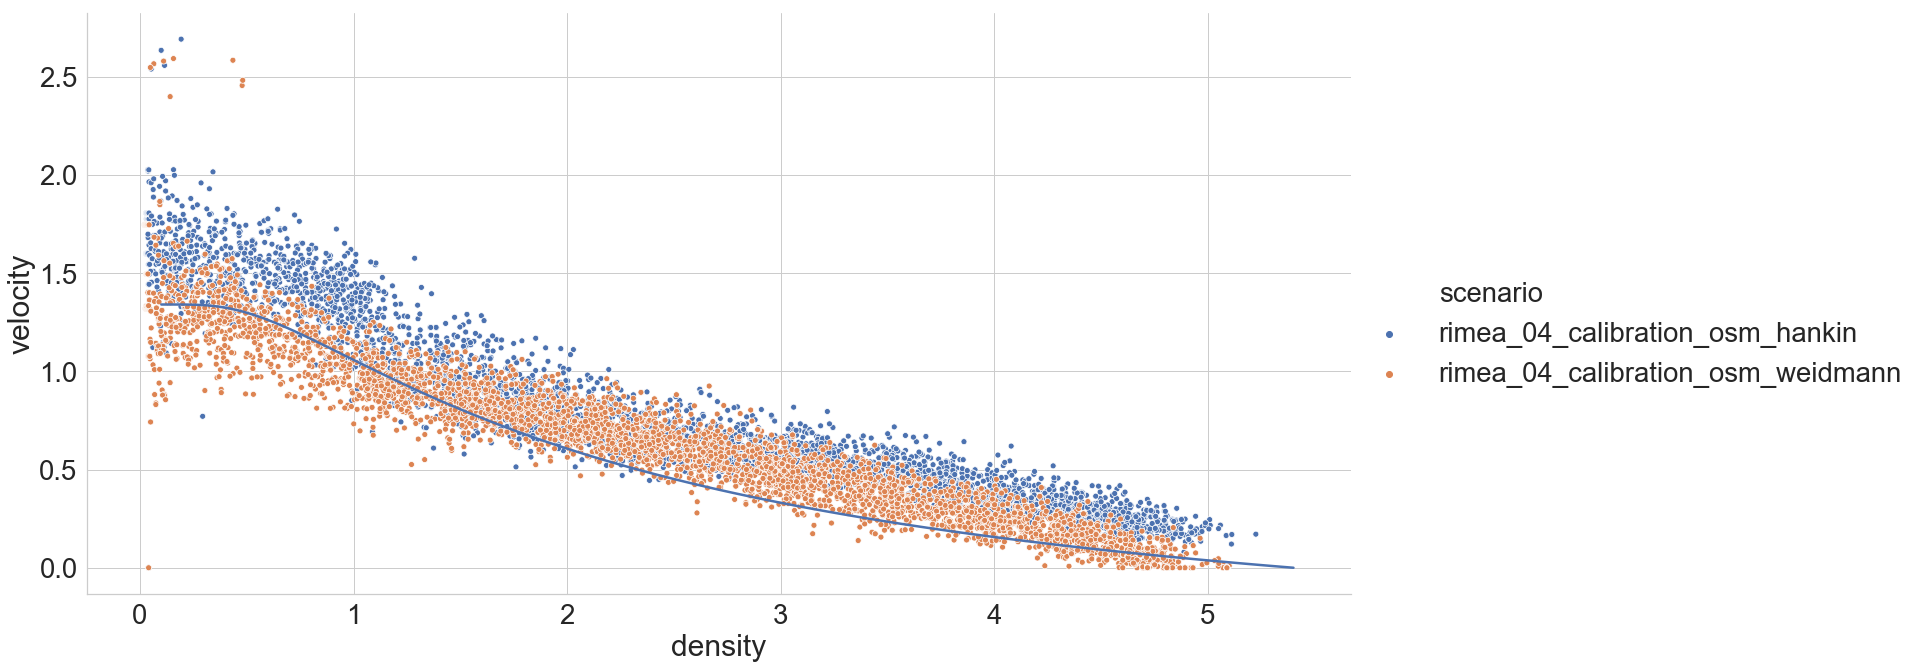

In [166]:
plotFundamentalDiagram(project, "dTimeStep.fundamentalDiagram")
plotKladek(x, meanVelocity, gamma, maxDensity)

## Method E Plots
This method is similar to method D but the density is defined by $$\langle \rho \rangle = \frac{1}{N} \sum\limits_{i=1}^{N} A_i ,$$
and the velocity is defined by 
$$\langle v \rangle = \sum\limits_{i=1}^{N} \frac{1}{A_i} \left( \sum\limits_{i=1}^{N} A_i v_i(t) \right) ,$$

where $N$ is the number of pedestrians inside the measurement area and $A_i$ is the area of the voronoi cell of agent $i$.

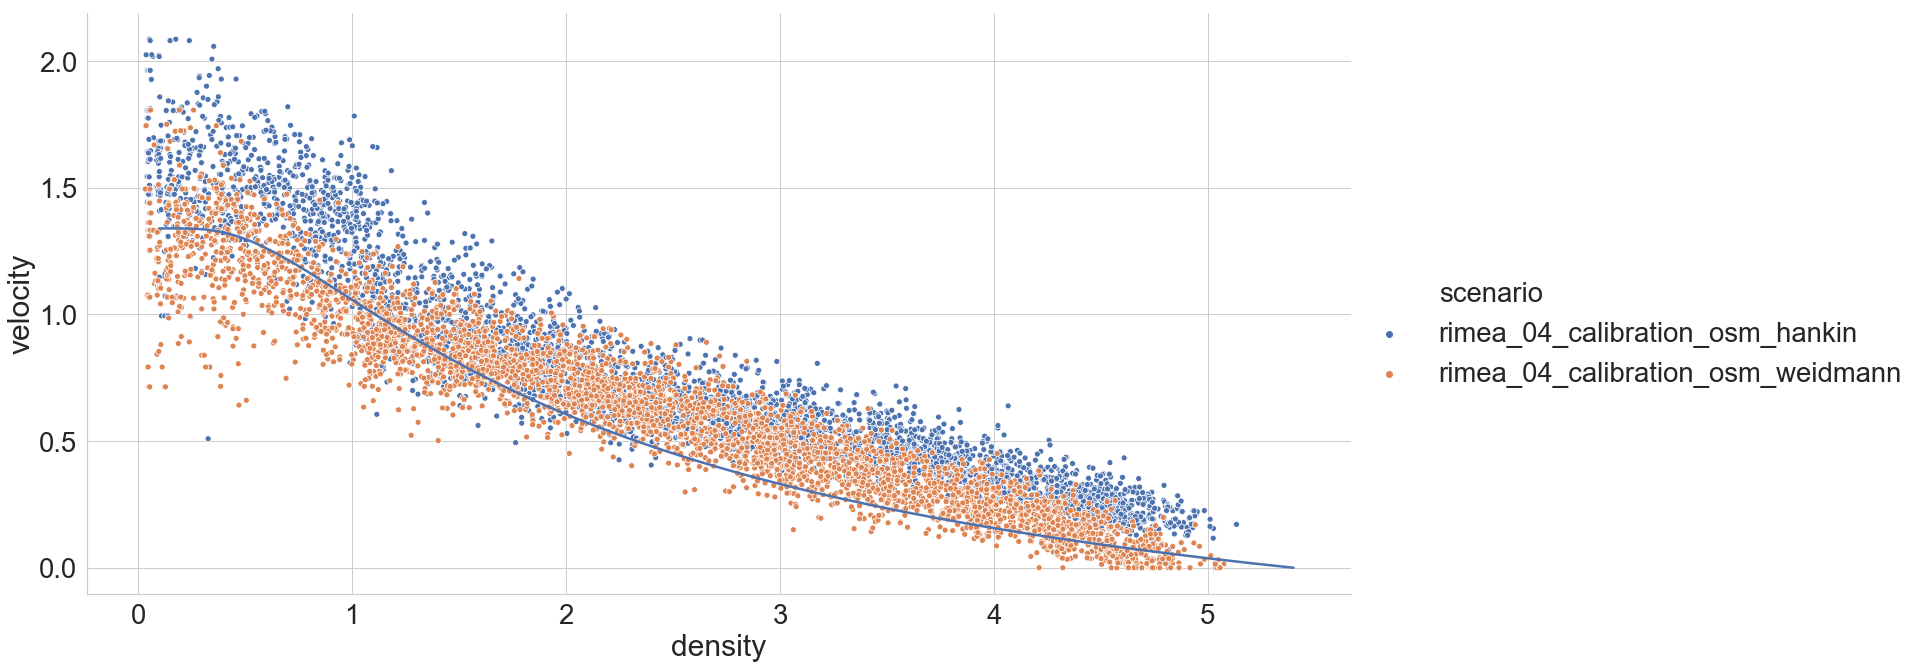

In [167]:
plotFundamentalDiagram(project, "eTimeStep.fundamentalDiagram")
plotKladek(x, meanVelocity, gamma, maxDensity)

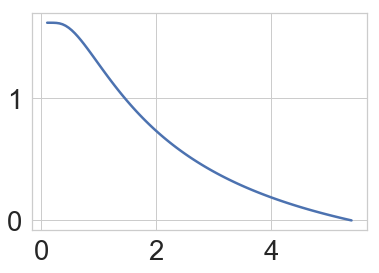

In [162]:
hmaxDensity = 5.4
hmeanVelocity = 1.62
hgamma = 1.913
hx = np.linspace(0.1, hmaxDensity, 100)
plotKladek(hx, hmeanVelocity, hgamma, hmaxDensity) # plot of the hankin reference line